<a href="https://colab.research.google.com/github/igorjoz/machine-learning-course-and-projects/blob/main/18_Fuzzy_logic_implementation_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

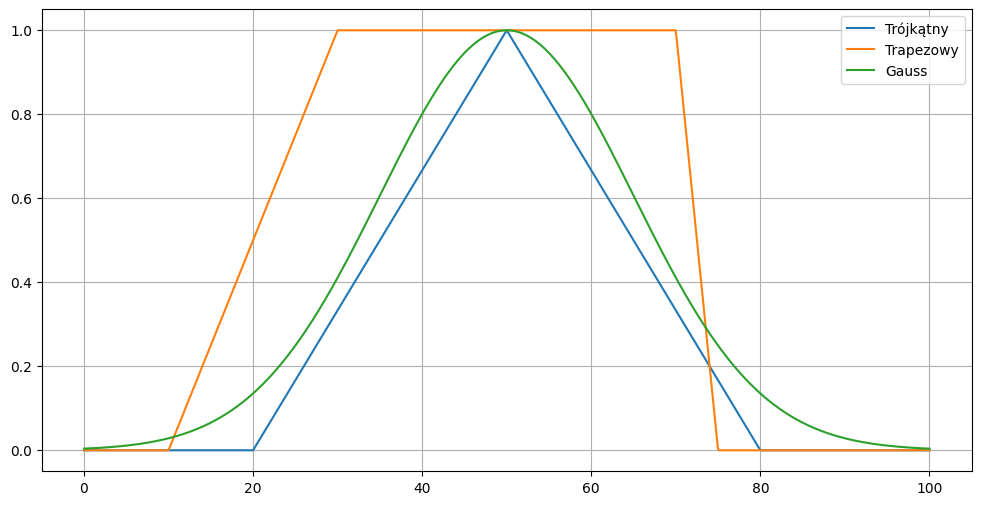

In [ ]:
!pip install -q scikit-fuzzy

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

x = np.linspace(0, 100, 1000)
trimf_values = fuzz.trimf(x, [20, 50, 80])
trapmf_values = fuzz.trapmf(x, [10, 30, 70, 75])
gaussmf_values = fuzz.gaussmf(x, mean=50, sigma=15)

plt.figure(figsize=(12,6))
plt.plot(x, trimf_values, label="Trójkątny")
plt.plot(x, trapmf_values, label="Trapezowy")
plt.plot(x, gaussmf_values, label="Gauss")
plt.grid(True)
plt.legend()
plt.show()

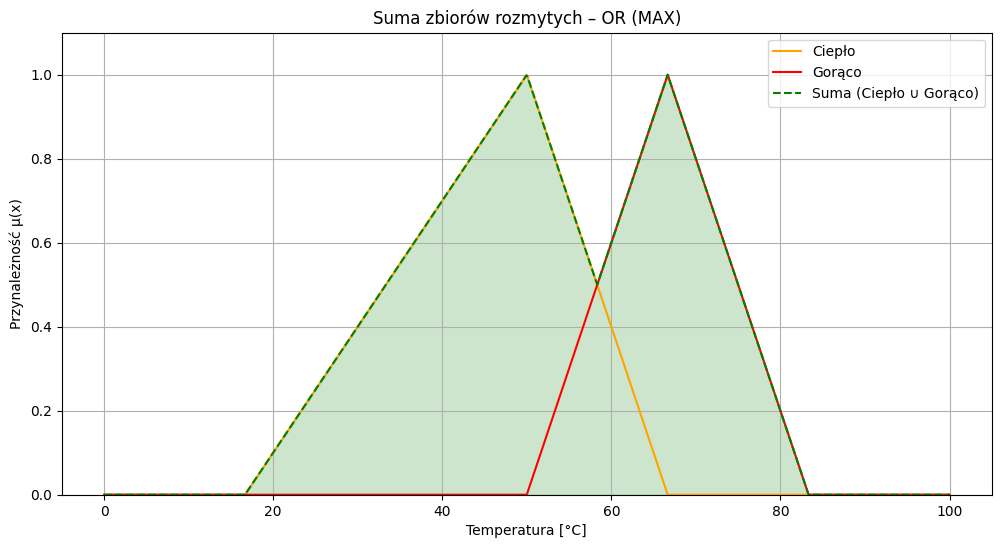

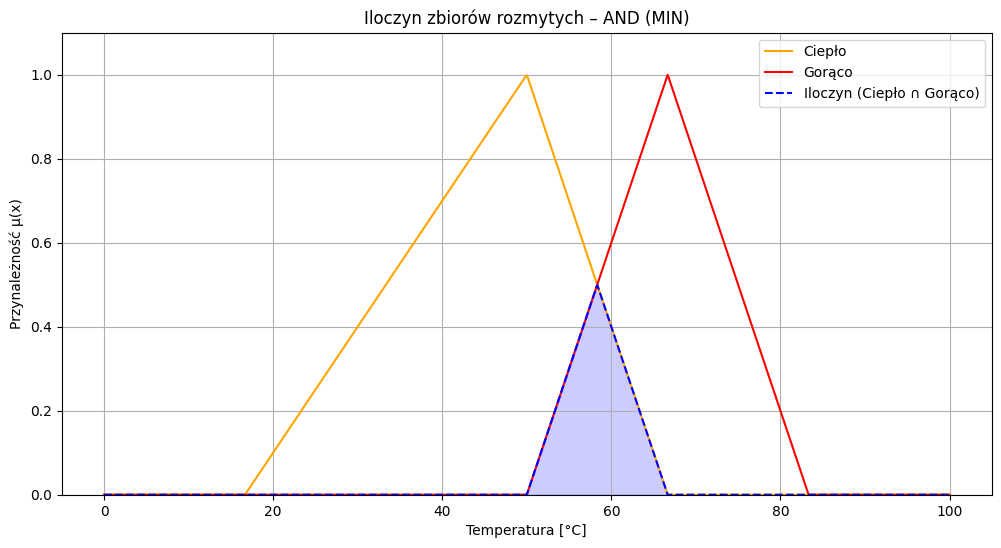

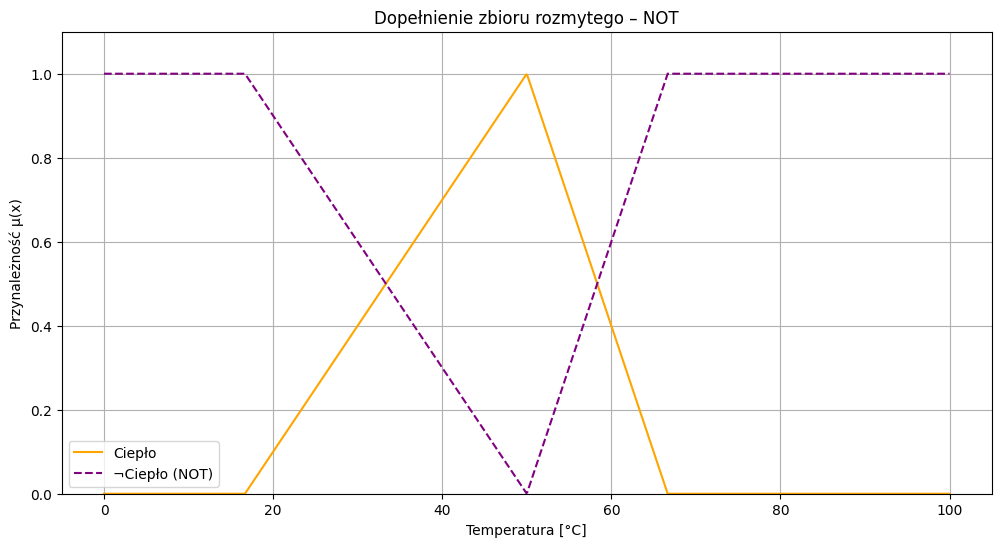

In [ ]:
x_temp = np.linspace(0, 60, 1000)
cieplo = fuzz.trimf(x_temp, [10, 30, 40])
goraco = fuzz.trimf(x_temp, [30, 40, 50])

suma = np.maximum(cieplo, goraco)
iloczyn = np.minimum(cieplo, goraco)
not_cieplo = 1 - cieplo

# Wykres
plt.figure(figsize=(12, 6))
plt.plot(x, cieplo, label='Ciepło', color='orange')
plt.plot(x, goraco, label='Gorąco', color='red')
plt.plot(x, suma, '--', label='Suma (Ciepło ∪ Gorąco)',
color='green')
plt.fill_between(x, 0, suma, color='green', alpha=0.2)
plt.title('Suma zbiorów rozmytych – OR (MAX)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Przynależność μ(x)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()

# Wykres
plt.figure(figsize=(12, 6))
plt.plot(x, cieplo, label='Ciepło', color='orange')
plt.plot(x, goraco, label='Gorąco', color='red')
plt.plot(x, iloczyn, '--', label='Iloczyn (Ciepło ∩ Gorąco)',
color='blue')
plt.fill_between(x, 0, iloczyn, color='blue', alpha=0.2)
plt.title('Iloczyn zbiorów rozmytych – AND (MIN)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Przynależność μ(x)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x, cieplo, label='Ciepło', color='orange')
plt.plot(x, not_cieplo, label='¬Ciepło (NOT)', color='purple',
linestyle='--')
plt.title('Dopełnienie zbioru rozmytego – NOT')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Przynależność μ(x)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()

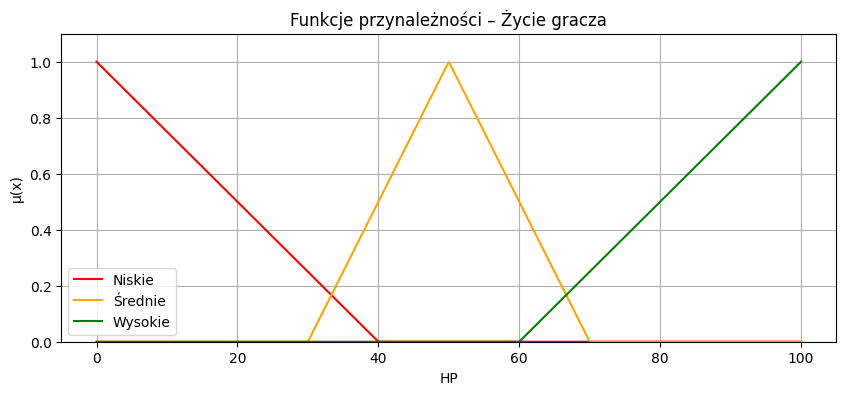

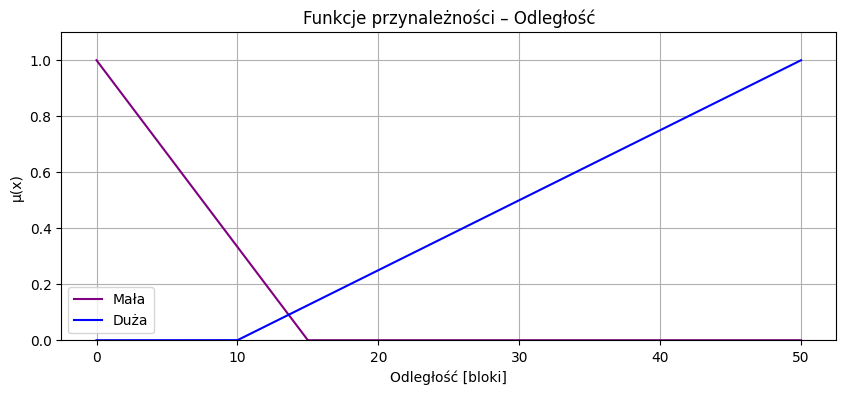

In [ ]:
x_life = np.linspace(0, 100, 1000)
x_dist = np.linspace(0, 50, 1000)

# Zbiory rozmyte - życie gracza
life_low = fuzz.trimf(x_life, [0, 0, 40])
life_med = fuzz.trimf(x_life, [30, 50, 70])
life_high = fuzz.trimf(x_life, [60, 100, 100])

# Zbiory rozmyte - dystans między szkielet, a graczem
dist_close = fuzz.trimf(x_dist, [0, 0, 15])
dist_far = fuzz.trimf(x_dist, [10, 50, 50])

# Wykres – Życie
plt.figure(figsize=(10, 4))
plt.plot(x_life, life_low, label='Niskie', color='red')
plt.plot(x_life, life_med, label='Średnie', color='orange')
plt.plot(x_life, life_high, label='Wysokie', color='green')
plt.title('Funkcje przynależności – Życie gracza')
plt.xlabel('HP')
plt.ylabel('μ(x)')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

# Wykres – Odległość
plt.figure(figsize=(10, 4))
plt.plot(x_dist, dist_close, label='Mała', color='purple')
plt.plot(x_dist, dist_far, label='Duża', color='blue')
plt.title('Funkcje przynależności – Odległość')
plt.xlabel('Odległość [bloki]')
plt.ylabel('μ(x)')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

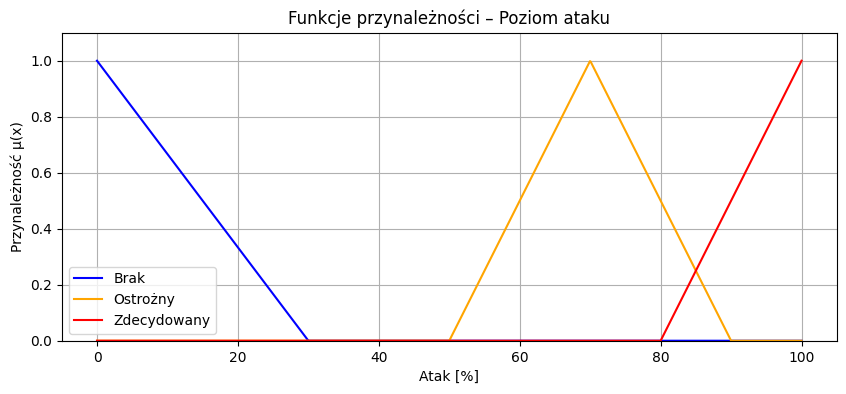

In [ ]:
x_attack = np.linspace(0, 100, 1000)

attack_none = fuzz.trimf(x_attack, [0, 0, 30])
attack_careful = fuzz.trimf(x_attack, [50, 70, 90])
attack_strong = fuzz.trimf(x_attack, [80, 100, 100])

# Wykres
plt.figure(figsize=(10, 4))
plt.plot(x_attack, attack_none, label='Brak', color='blue')
plt.plot(x_attack, attack_careful, label='Ostrożny',
color='orange')
plt.plot(x_attack, attack_strong, label='Zdecydowany',
color='red')
plt.title('Funkcje przynależności – Poziom ataku')
plt.xlabel('Atak [%]')
plt.ylabel('Przynależność μ(x)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()

Poziom ataku: 73.37168893939355


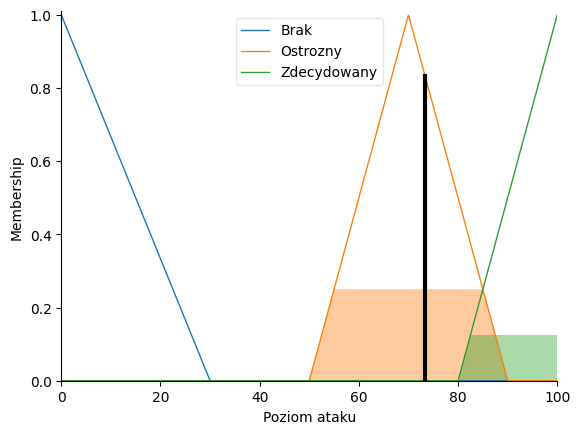

In [ ]:
life = ctrl.Antecedent(x_life, 'Zycie gracza')
distance = ctrl.Antecedent(x_dist, 'Odleglosc')
attack = ctrl.Consequent(x_attack, 'Poziom ataku')

life['Niskie'] = fuzz.trimf(life.universe, [0, 0, 40])
life['Srednie'] = fuzz.trimf(life.universe, [30, 50, 70])
life['Wysokie'] = fuzz.trimf(life.universe, [60, 100, 100])

distance['Mala'] = fuzz.trimf(distance.universe, [0, 0, 15])
distance['Duza'] = fuzz.trimf(distance.universe, [10, 50, 50])

attack['Brak'] = fuzz.trimf(attack.universe, [0, 0, 30])
attack['Ostrozny'] = fuzz.trimf(attack.universe, [50, 70, 90])
attack['Zdecydowany'] = fuzz.trimf(attack.universe, [80, 100, 100])

rule1 = ctrl.Rule(life['Niskie'], attack['Zdecydowany'])
rule2 = ctrl.Rule(life['Srednie'] & distance['Duza'], attack['Ostrozny'])
rule3 = ctrl.Rule(life['Srednie'] & distance['Mala'], attack['Ostrozny'])
rule4 = ctrl.Rule(life['Wysokie'] & distance['Mala'], attack['Brak'])

attack_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
attack_sim = ctrl.ControlSystemSimulation(attack_ctrl)

attack_sim.input['Zycie gracza'] = 35
attack_sim.input['Odleglosc'] = 20

attack_sim.compute()

print("Poziom ataku:", attack_sim.output['Poziom ataku'])
attack.view(sim=attack_sim)